In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import plot_importance

In [ ]:
from google.colab import files
files.upload()

Saving player_stats.csv to player_stats (1).csv


{'player_stats (1).csv': b'name,overall_score,position_score,height,weight,pref_foot,birthdate,age,pref_pos,work_rate,weak_foot,skill_moves,value,wage,joined_club,contract_expires,Ball Control,Dribbling,Marking,Slide Tackle,Stand Tackle,Aggression,Reactions,Att. Position,Interceptions,Vision,Composure,Crossing,Short Pass,Long Pass,Acceleration,Stamina,Strength,Balance,Sprint Speed,Agility,Jumping,Heading,Shot Power,Finishing,Long Shots,Curve,FK Acc.,Penalties,Volleys,GK Positioning,GK Diving,GK Handling,GK Kicking,GK Reflexes,ball_skill_avg,defence_avg,mental_avg,passing_avg,physical_avg,shooting_avg,goalkeeper_avg\nErling Haaland,91,94,195 cm,94 kg,Left,"July 21, 2000",24,ST,High / Medium,3.0,3.0,$157.000.000,$340.000,"July 1, 2022",2027,82,79,None,29,47,87,94,96,43,74,87,47,77,53,82,76,93,72,94,76,93,83,94,96,86,77,62,84,90,11,7,14,13,7,80.5,,80.16666666666667,59.0,83.71428571428571,84.0,10.4\nKylian Mbapp\xc3\xa9,91,94,182 cm,75 kg,Right,"Dec. 20, 1998",25,STLW,High / Low,4.0,5.0,$1

In [ ]:
# Load the CSV file
raw_data = pd.read_csv('player_stats.csv')

In [ ]:
print(raw_data.shape)
raw_data.head()

(18240, 57)


name  overall_score  position_score  height weight pref_foot  \
0    Erling Haaland             91              94  195 cm  94 kg      Left   
1     Kylian Mbappé             91              94  182 cm  75 kg     Right   
2   Kevin De Bruyne             91              91  181 cm  75 kg     Right   
3        Harry Kane             90              90  188 cm  89 kg     Right   
4  Thibaut Courtois             90              90  199 cm  96 kg      Left   

       birthdate   age pref_pos        work_rate  weak_foot  skill_moves  \
0  July 21, 2000  24.0       ST    High / Medium        3.0          3.0   
1  Dec. 20, 1998  25.0     STLW       High / Low        4.0          5.0   
2  June 28, 1991  33.0    CMCAM    High / Medium        5.0          4.0   
3  July 28, 1993  31.0       ST      High / High        5.0          3.0   
4   May 11, 1992  32.0       GK  Medium / Medium        3.0          1.0   

          value      wage    joined_club contract_expires  Ball Control  \
0  $157.000.000  $340.000   July 1, 2022             2027            82   
1  $153.500.000  $225.000   July 1, 2018             2024            92   
2  $103.000.000  $350.000  Aug. 30, 2015             2025            92   
3  $119.500.000  $230.000  July 28, 2010             2024            87   
4   $63.000.000  $250.000   Aug. 9, 2018             2026            23   

   Dribbling  Marking  Slide Tackle  Stand Tackle  Aggression  Reactions  \
0         79      NaN            29            47          87         94   
1         93      NaN            32            34          64         93   
2         86      NaN            53            70          75         92   
3         82      NaN            38            46          80         93   
4         13      NaN            16            18          23         88   

   Att. Position  Interceptions  Vision  Composure  Crossing  Short Pass  \
0             96             43      74         87        47          77   
1             93             38      83         88        78          86   
2             88             66      95         88        95          94   
3             94             42      87         92        80          87   
4             13             15      44         66        14          33   

   Long Pass  Acceleration  Stamina  Strength  Balance  Sprint Speed  Agility  \
0         53            82       76        93       72            94       76   
1         71            97       88        77       82            97       93   
2         94            72       88        74       78            72       74   
3         88            67       83        84       73            71       66   
4         35            42       38        70       45            52       63   

   Jumping  Heading  Shot Power  Finishing  Long Shots  Curve  FK Acc.  \
0       93       83          94         96          86     77       62   
1       88       73          90         94          83     80       69   
2       72       55          92         85          92     92       83   
3       87       89          93         95          87     82       65   
4       68       13          57         14          17     19       20   

   Penalties  Volleys  GK Positioning  GK Diving  GK Handling  GK Kicking  \
0         84       90              11          7           14          13   
1         84       84              11         13            5           7   
2         83       83              10         15           13           5   
3         92       89              14          8           10          11   
4         27       12              90         85           89          76   

   GK Reflexes  ball_skill_avg  defence_avg  mental_avg  passing_avg  \
0            7            80.5          NaN   80.166667    59.000000   
1            6            92.5          NaN   76.500000    78.333333   
2           13            89.0          NaN   84.000000    94.333333   
3           11            84.5     

In [ ]:
raw_data.columns

Index(['name', 'overall_score', 'position_score', 'height', 'weight',
       'pref_foot', 'birthdate', 'age', 'pref_pos', 'work_rate', 'weak_foot',
       'skill_moves', 'value', 'wage', 'joined_club', 'contract_expires',
       'Ball Control', 'Dribbling', 'Marking', 'Slide Tackle', 'Stand Tackle',
       'Aggression', 'Reactions', 'Att. Position', 'Interceptions', 'Vision',
       'Composure', 'Crossing', 'Short Pass', 'Long Pass', 'Acceleration',
       'Stamina', 'Strength', 'Balance', 'Sprint Speed', 'Agility', 'Jumping',
       'Heading', 'Shot Power', 'Finishing', 'Long Shots', 'Curve', 'FK Acc.',
       'Penalties', 'Volleys', 'GK Positioning', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Reflexes', 'ball_skill_avg', 'defence_avg',
       'mental_avg', 'passing_avg', 'physical_avg', 'shooting_avg',
       'goalkeeper_avg'],
      dtype='object')

In [ ]:
# Basic data cleaning
data = raw_data.copy()

# Turn height from str "X cm" into float. Weight from "X kg" into float.
def convert_hw(x):
    if type(x) == str:
        return float(x.split(' ')[0])
    else:
        return x
data['height'] = data['height'].apply(convert_hw)
data['weight'] = data['weight'].apply(convert_hw)

# Replace empty values with averages
data['height'] = data['height'].fillna(data['height'].mean())
data['weight'] = data['weight'].fillna(data['weight'].mean())

# Drop value because it's not useful
data = data.drop('name', axis=1)
data = data.drop('value', axis=1)

# Drop defence avg and marking because they are all nan
data = data.drop('defence_avg', axis=1)
data = data.drop('Marking', axis=1)

# Turn wage from str "$X" into float
def convert_wage(x):
    if type(x) == str:
        return float(x[1:])
    else:
        return x
data['wage'] = data['wage'].apply(convert_wage)

# Turn pref foot into 0/1
def convert_foot(x):
    if x == 'Right':
        return 0
    else:
        return 1
data['pref_foot'] = data['pref_foot'].apply(convert_foot)

print("Basic data cleaning done")
pd.set_option('display.max_columns', None)
data.head()

# Drop rows with NaN wages
data = data.dropna(subset=['wage'])

print(data.shape)

Basic data cleaning done
(18142, 53)


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X = data.drop('wage', axis=1)
y = data['wage']

def basic_proprocessing(X, y):
    categorical_columns = ['birthdate', 'pref_pos', 'work_rate', 'joined_club', 'contract_expires']
    label_encoder = LabelEncoder()

    for column in categorical_columns:
        X[column] = label_encoder.fit_transform(X[column].astype(str))

    indices = np.arange(X.shape[0])
    X_train, X_test, y_train, y_test, train_idx, test_idx = train_test_split(X, y, indices, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test, train_idx, test_idx

X_train, X_test, y_train, y_test, train_idx, test_idx = basic_proprocessing(X.copy(), y.copy())
print(X_train.shape, X_test.shape)

import xgboost as xgb
model = xgb.XGBRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')


(14513, 52) (3629, 52)
Mean Squared Error: 90.90786482044345
R2 Score: 0.7279767794583916


<Figure size 1000x800 with 0 Axes>

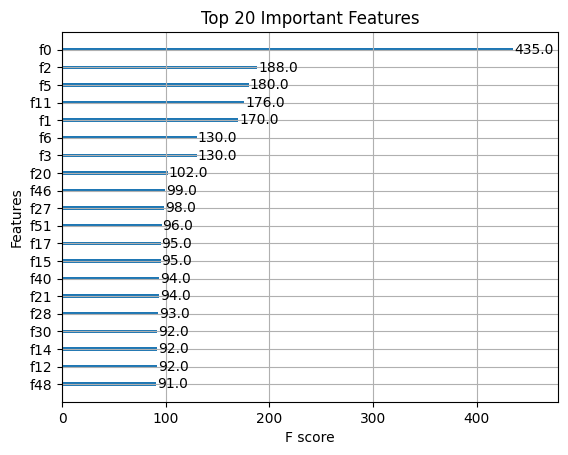

In [ ]:
# Visualize feature importance
plt.figure(figsize=(10, 8))
plot_importance(model, max_num_features=20)
plt.title("Top 20 Important Features")
plt.show()

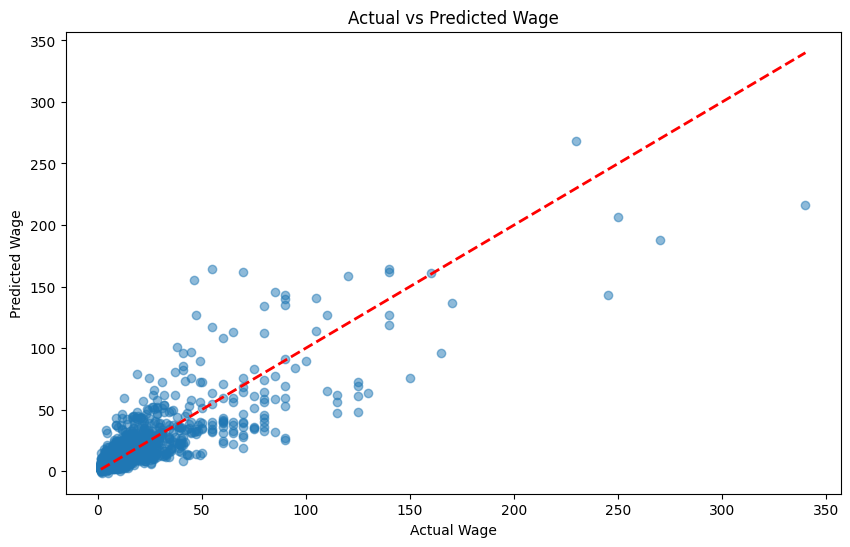

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Wage")
plt.ylabel("Predicted Wage")
plt.title("Actual vs Predicted Wage")
plt.show()

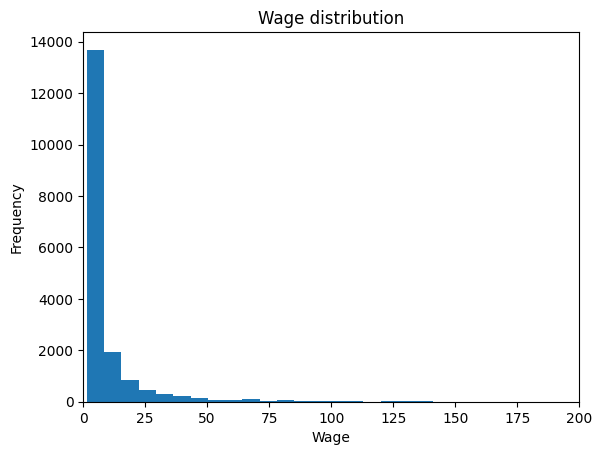

In [ ]:
# More preprocessing. See wage distribution.
plt.hist(y, bins=50)
plt.xlabel('Wage')
plt.ylabel('Frequency')
plt.xlim(0, 200)
plt.title('Wage distribution')
plt.show()

Text(0, 0.5, 'Frequency')

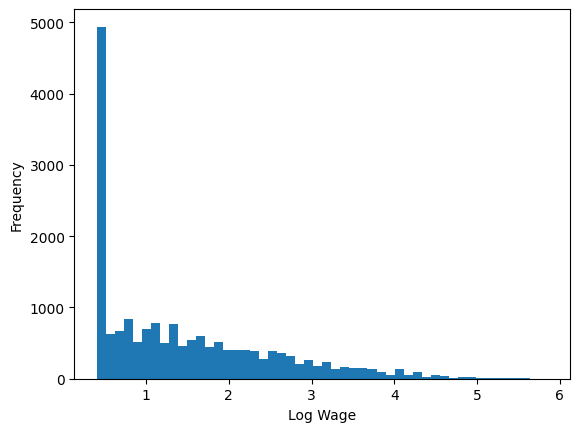

In [ ]:
# Log transform the wage
dlogy = np.log(y)
plt.hist(dlogy, bins=50)
plt.xlabel('Log Wage')
plt.ylabel('Frequency')


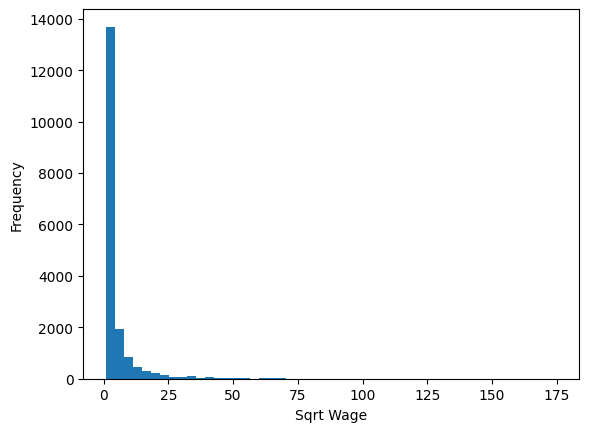

In [ ]:
# Squared root transform the wage. Led to best results in practice.
ysqrt = y ** 1/2
plt.hist(ysqrt, bins=50)
plt.xlabel('Sqrt Wage')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Frequency')

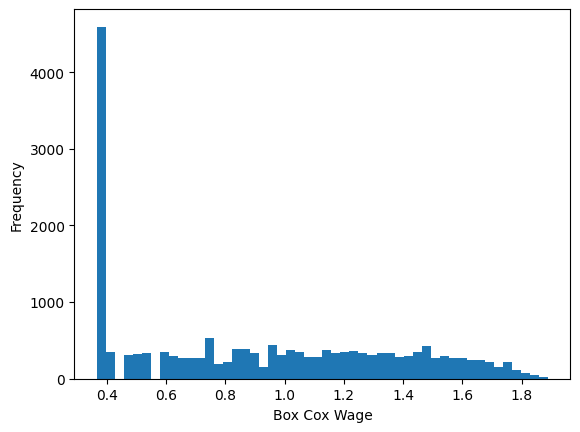

In [ ]:
# Box Cox
from scipy.stats import boxcox
bcy, lambda_param = boxcox(y)
plt.hist(bcy, bins=50)
plt.xlabel('Box Cox Wage')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

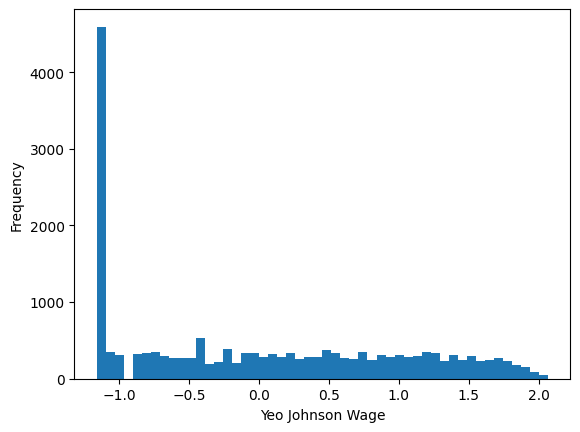

In [ ]:
# Yeo Johnson
from sklearn.preprocessing import PowerTransformer
yj = PowerTransformer(method='yeo-johnson')
yjy = yj.fit_transform(y.values.reshape(-1, 1))
plt.hist(yjy, bins=50)
plt.xlabel('Yeo Johnson Wage')
plt.ylabel('Frequency')

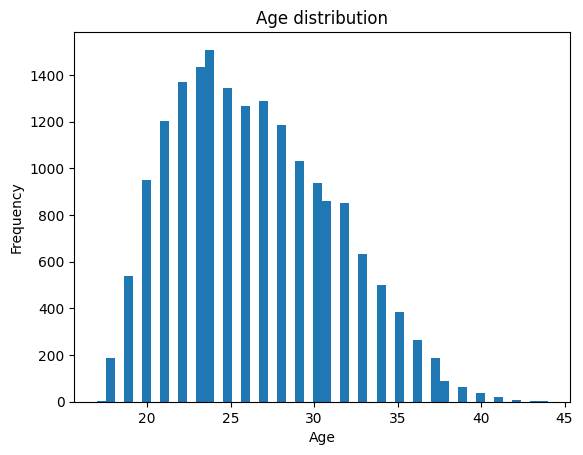

In [ ]:
# More preprocessing. See age distribution.
plt.hist(X['age'], bins=50)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution')
plt.show()

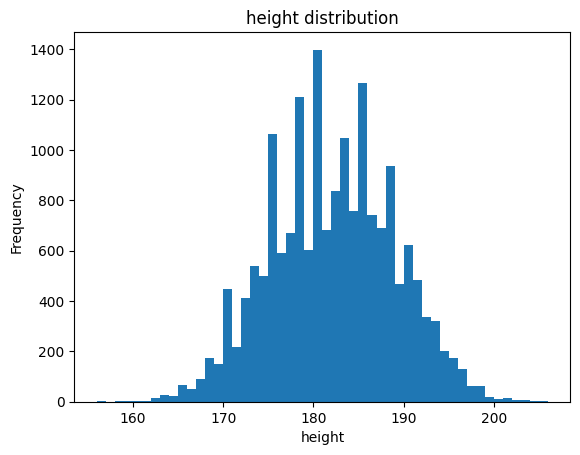

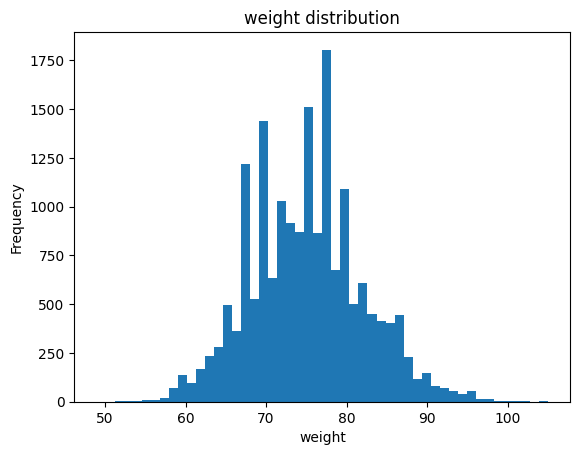

In [ ]:
# More preprocessing. See height weight distribution.
for column in ['height', 'weight']:
    plt.hist(X[column], bins=50)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'{column} distribution')
    plt.show()

In [ ]:
# More preprocessing. Check birthdate format.
X['birthdate'].head()
pd.to_datetime(X['birthdate'], format='mixed').head()

0   2000-07-21
1   1998-12-20
2   1991-06-28
3   1993-07-28
4   1992-05-11
Name: birthdate, dtype: datetime64[ns]

In [ ]:
# More preprocessing. Check joined club format and contract expires format.
X['joined_club'][167]

# Extract year. Take last
# Replace nan in contract expires with mean
# X['contract_expires'].str.split(' ').str[-1].astype(int).head()

#
filled_ce = X['contract_expires'].replace(np.nan, 'nan')
mean = filled_ce[filled_ce != 'nan'].str.split(' ').str[-1].astype(int).mean()
filled_ce = filled_ce.replace('nan', "dummy " + str(mean))

filled_ce = filled_ce.str.split(' ').str[-1].astype(float).apply(np.ceil).astype(int)

filled_ce.head()

# Check joined club year

filled_jc = X['joined_club']
years = filled_jc.str.split(' ').str[-1]
def is_convertible(x):
    try:
        float(x)
        return True
    except Exception as e:
        return False
valid_mask = years.apply(is_convertible)
valid_mean = years[valid_mask].astype(float).mean()

def convert(x):
    try:
        return int(x)
    except Exception as e:
        return valid_mean
years = years.apply(convert)


In [ ]:
# More preprocessing. See pref_pos distribution.
print(X['pref_pos'].value_counts())

pref_pos
CB         2362
GK         1982
ST         1679
CDMCM       941
CMCDM       699
           ... 
CMLMRB        1
RWCMST        1
RWCFST        1
CMCDMRW       1
LMRWBRM       1
Name: count, Length: 702, dtype: int64


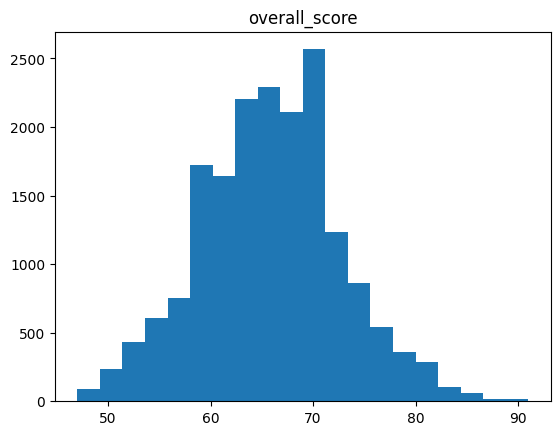

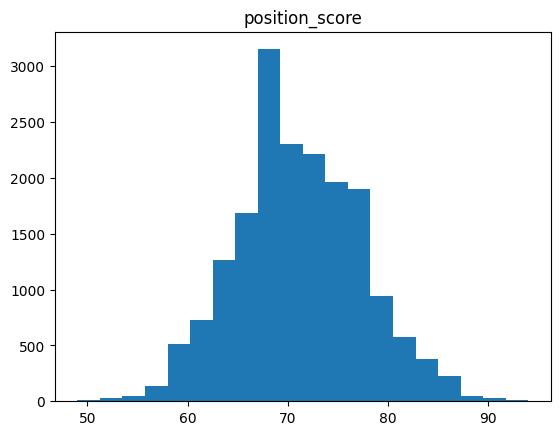

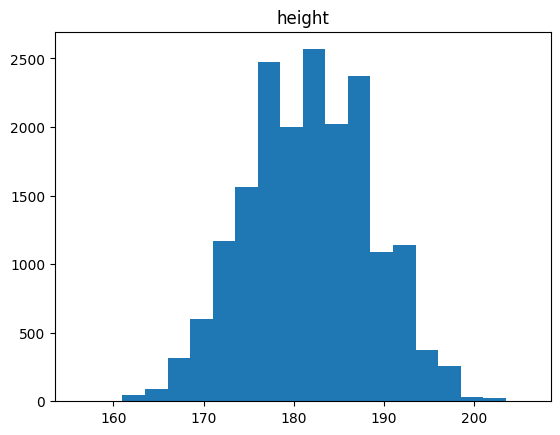

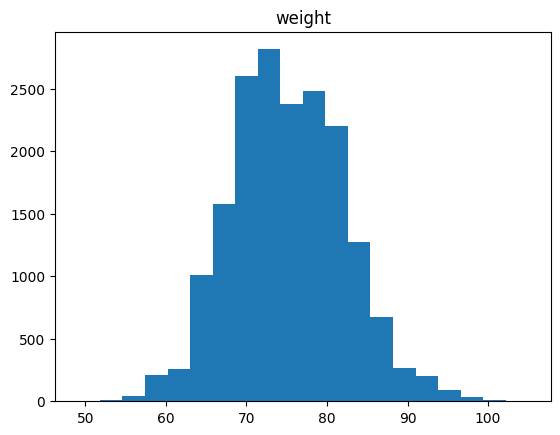

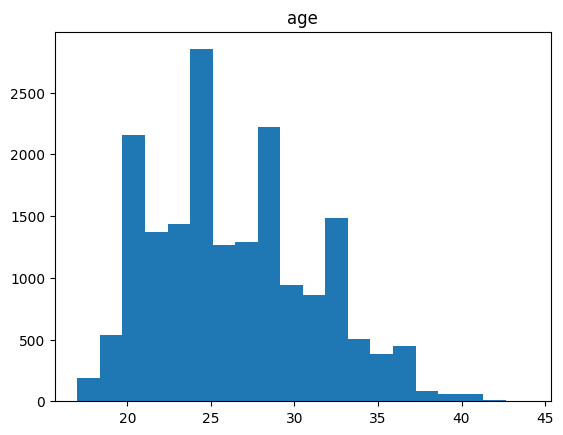

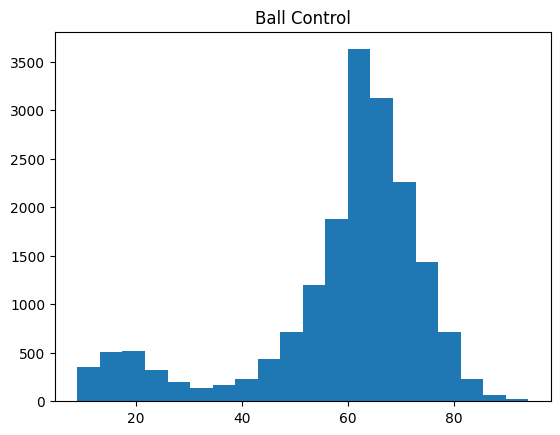

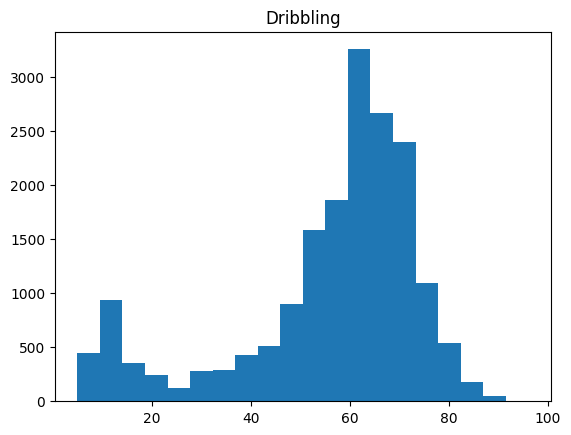

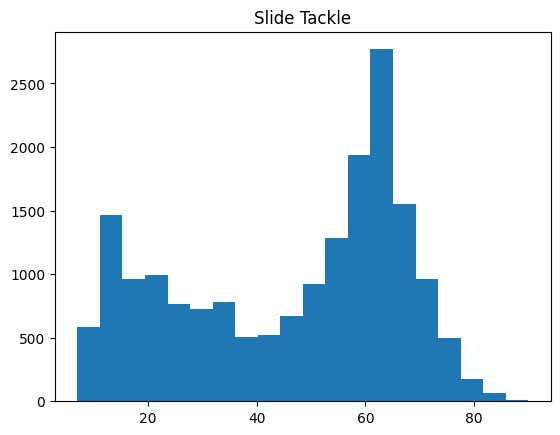

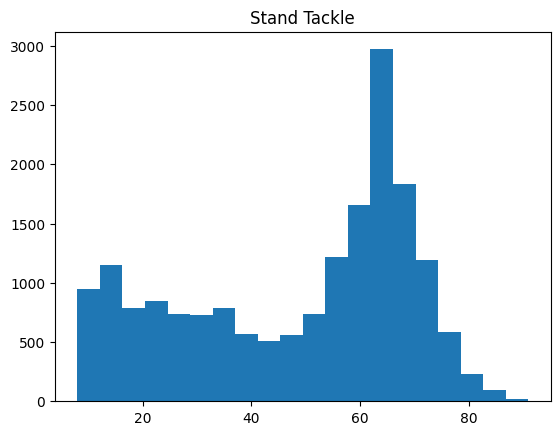

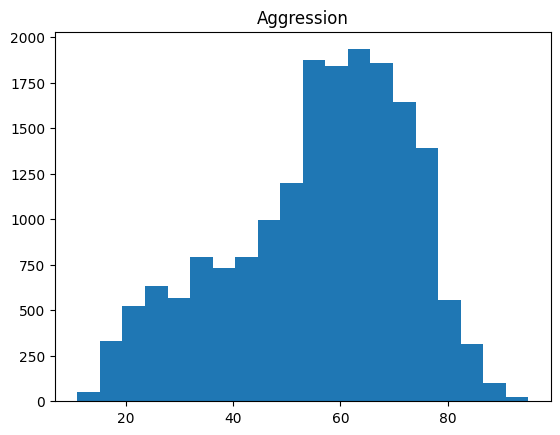

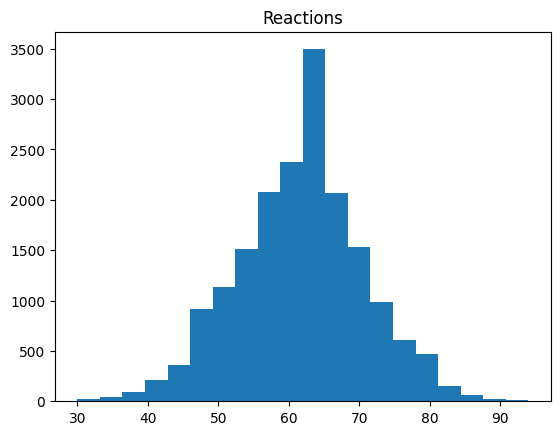

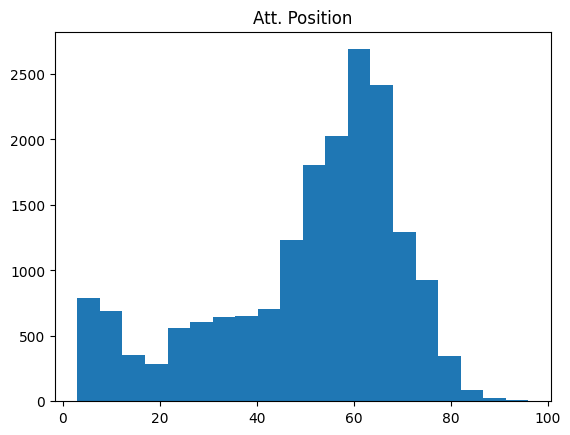

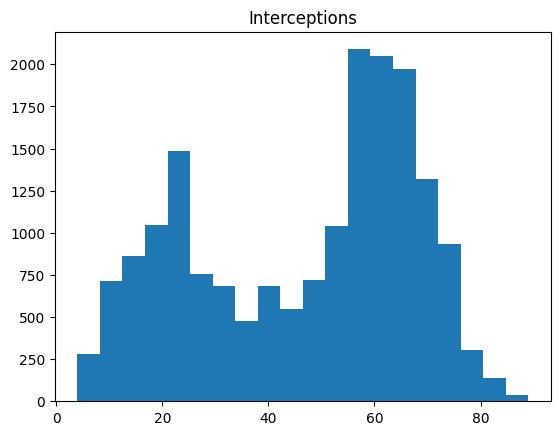

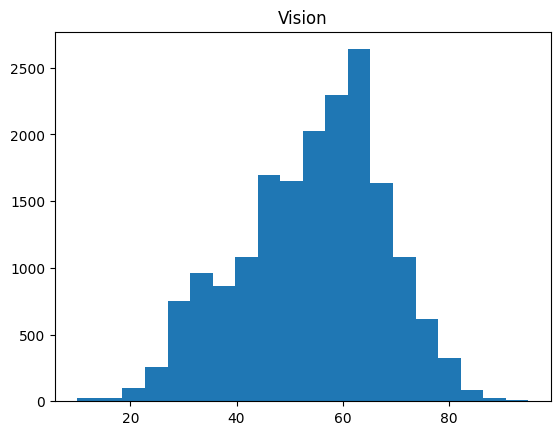

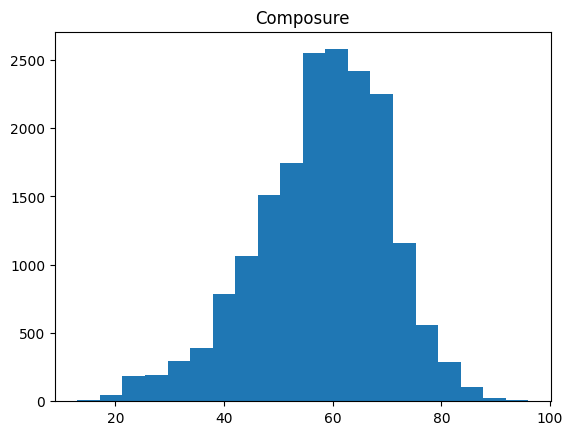

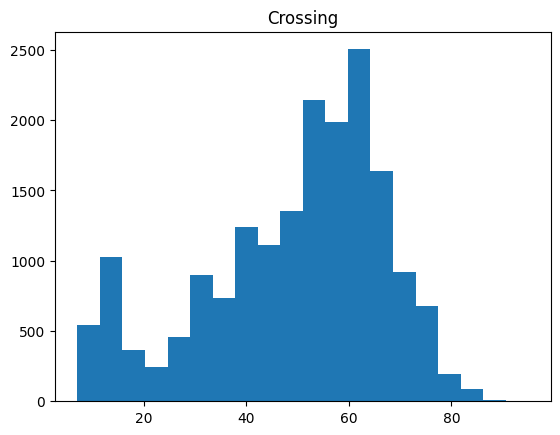

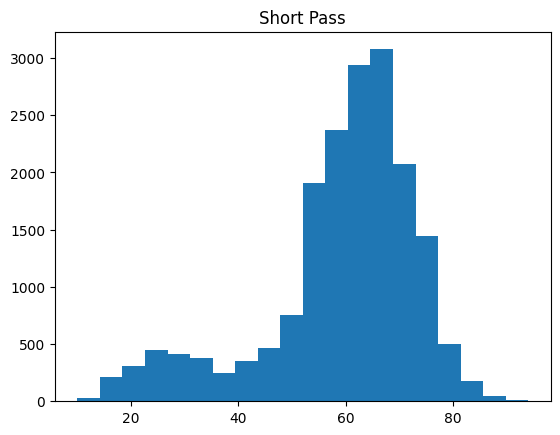

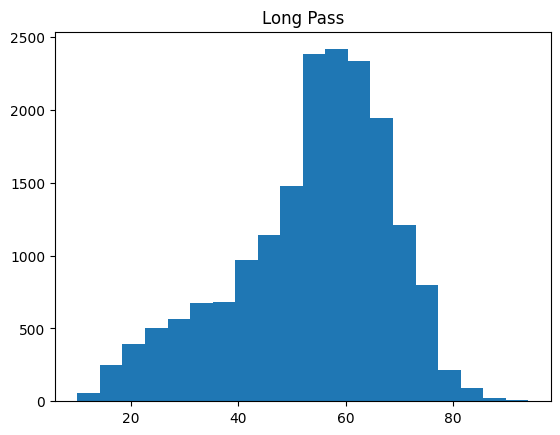

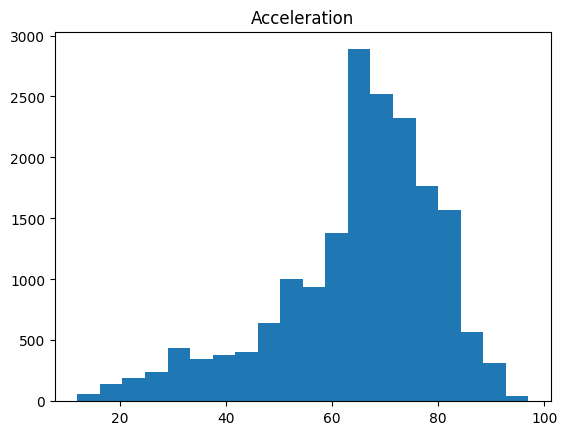

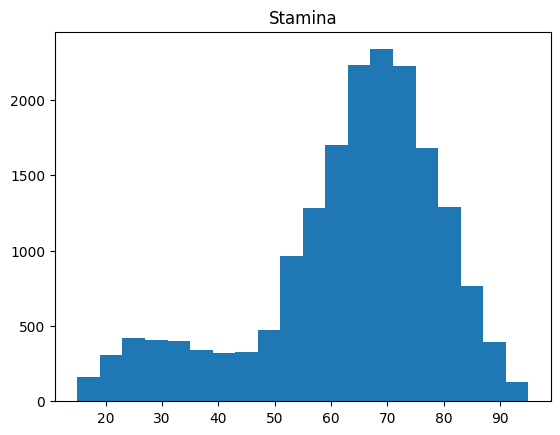

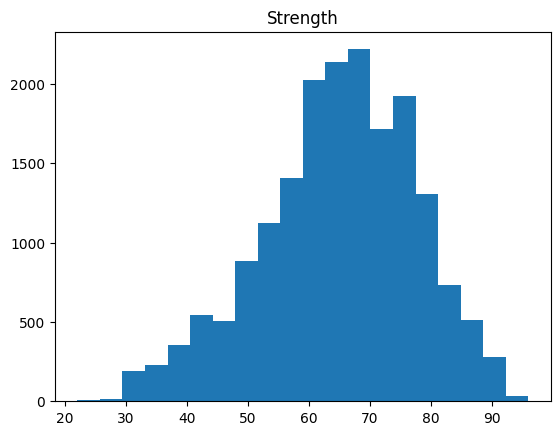

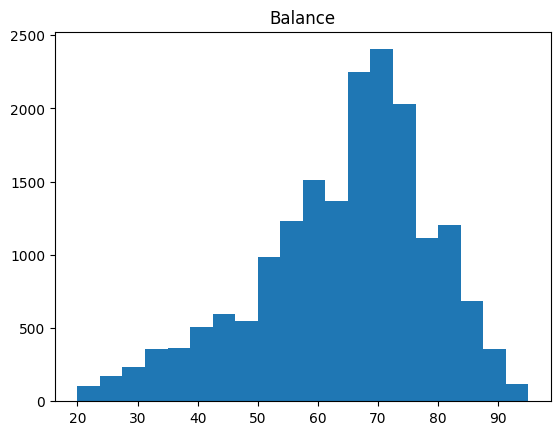

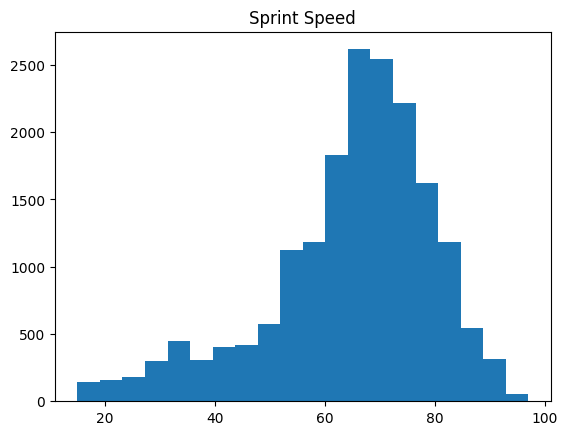

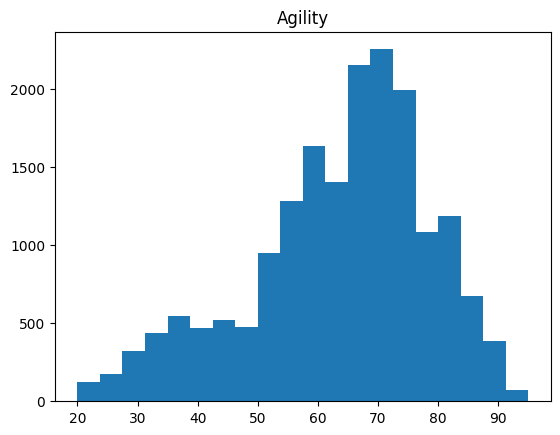

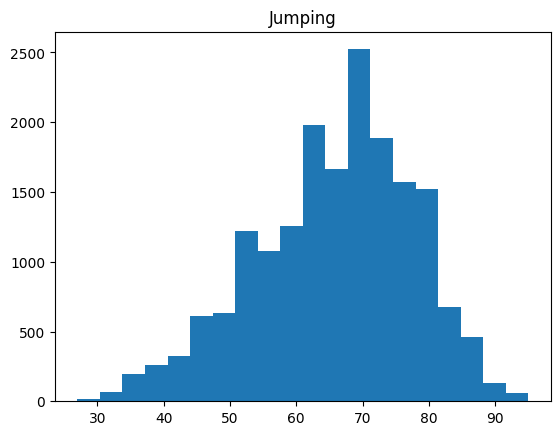

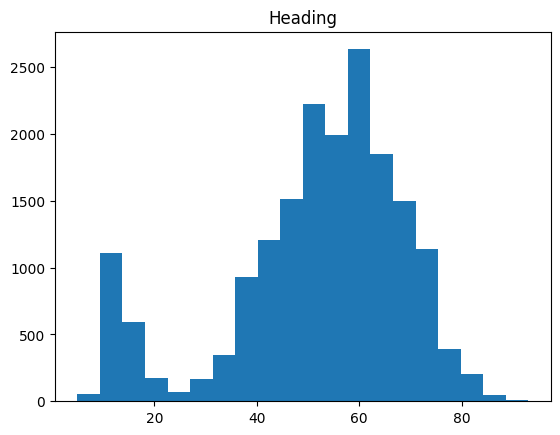

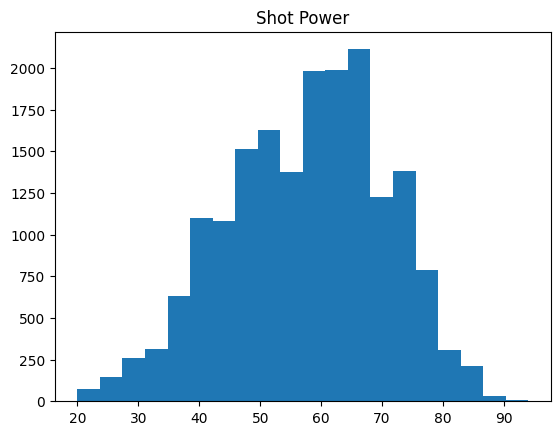

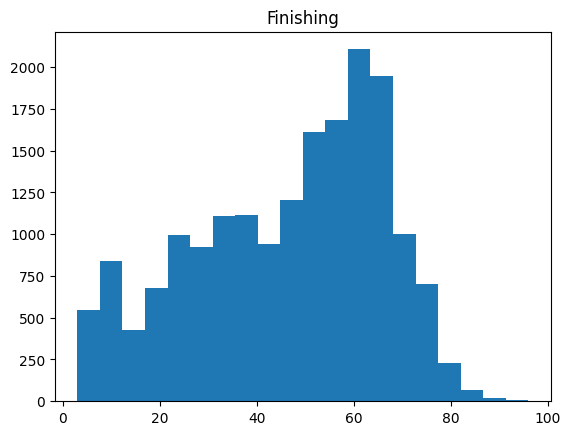

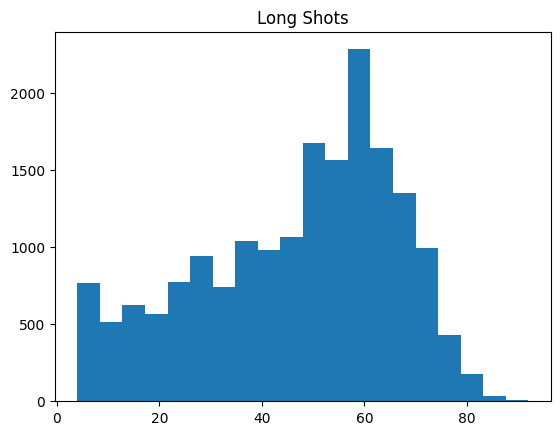

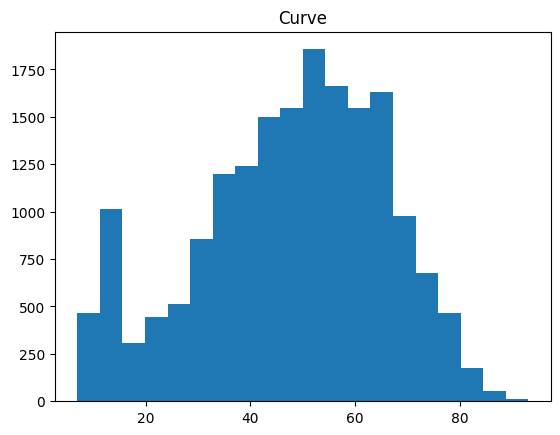

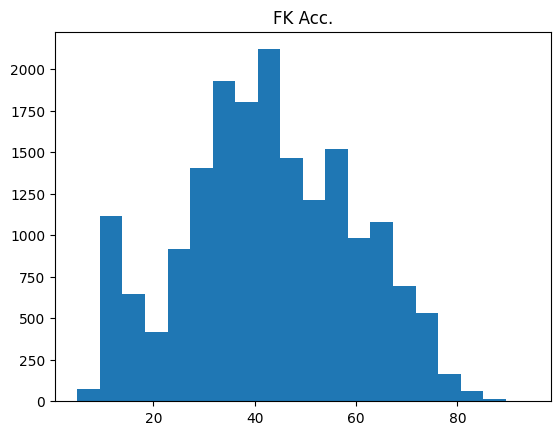

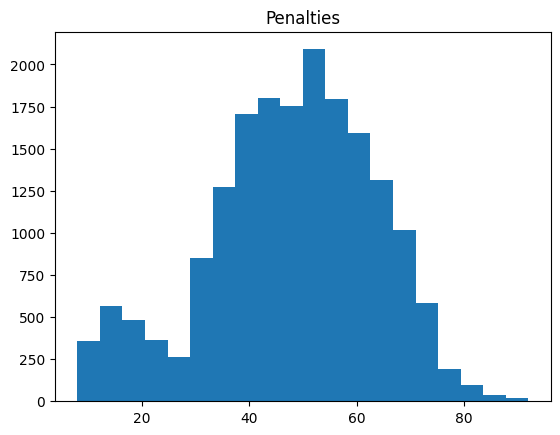

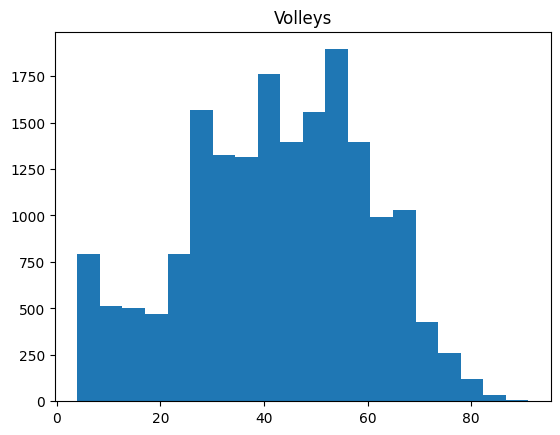

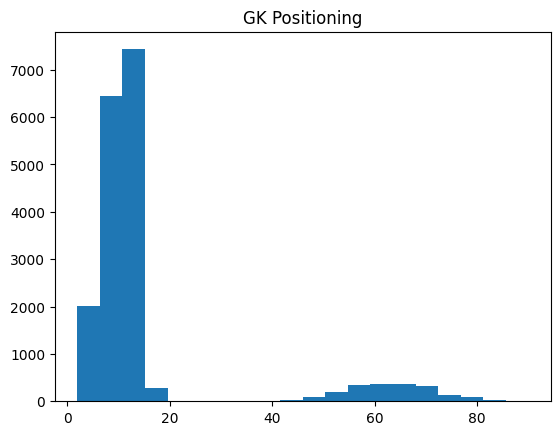

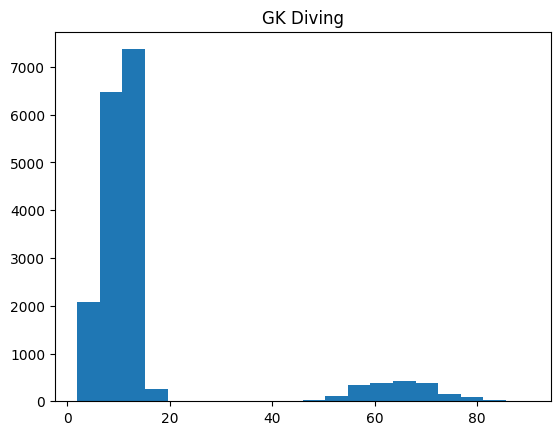

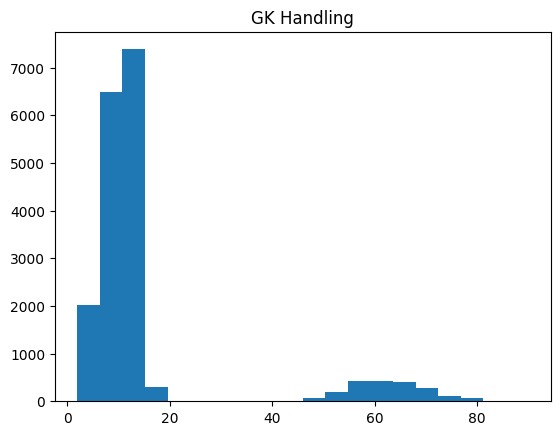

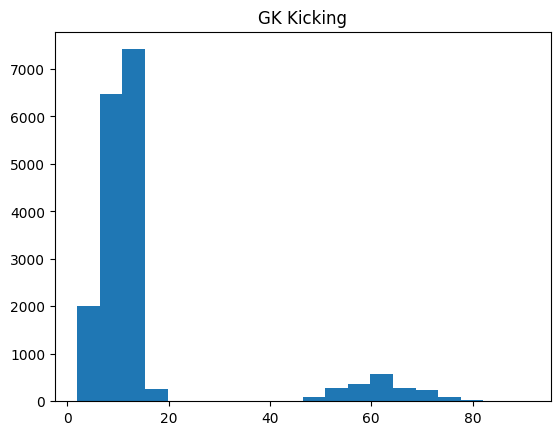

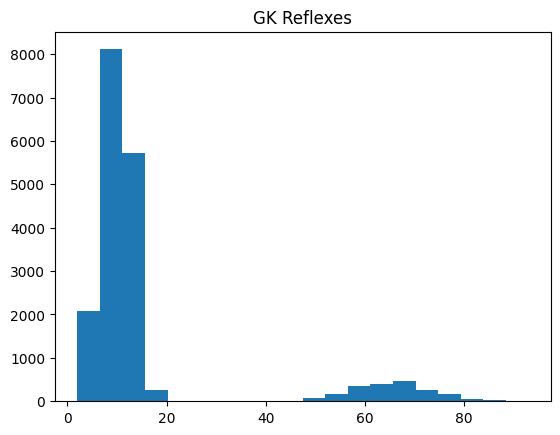

In [ ]:
# More preprocessing. See score distribution.
for column in ['overall_score', 'position_score', 'height', 'weight', 'age', 'Ball Control', 'Dribbling', 'Slide Tackle', 'Stand Tackle', 'Aggression', 'Reactions', 'Att. Position', 'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short Pass', 'Long Pass', 'Acceleration', 'Stamina', 'Strength', 'Balance', 'Sprint Speed', 'Agility', 'Jumping', 'Heading', 'Shot Power', 'Finishing', 'Long Shots', 'Curve', 'FK Acc.', 'Penalties', 'Volleys', 'GK Positioning', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Reflexes']:
    plt.hist(data[column], bins=20)
    plt.title(column)
    plt.show()


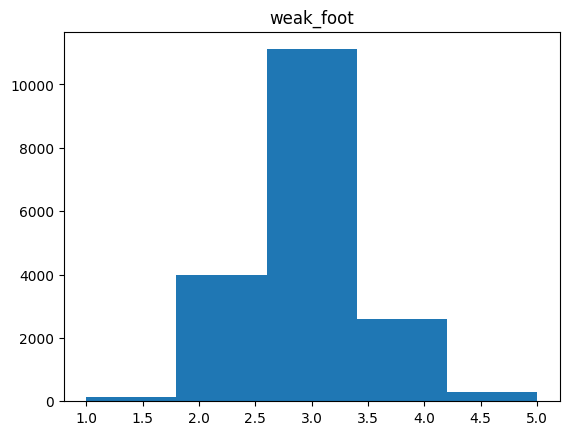

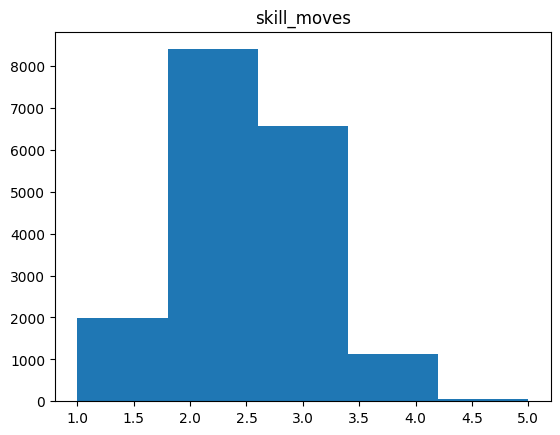

In [ ]:
# More preprocessing. Check weak foot and skill moves
for column in ['weak_foot', 'skill_moves']:
    plt.hist(data[column], bins=5)
    plt.title(column)
    plt.show()

In [ ]:
# More preprocessing.
from sklearn.preprocessing import QuantileTransformer, RobustScaler
from tqdm import tqdm

class LogTransformer():
    def __init__(self, base):
        self.base = base

    def fit(self, X):
        return self

    def transform(self, X):
        return np.log(X) / np.log(self.base)

    def fit_transform(self, X):
        return self.fit(X).transform(X)

    def inverse_transform(self, X):
        return np.power(X, self.base)

class SqrtTransformer():
    def __init__(self, power=1/2):
        self.power = power

    def fit(self, X):
        return self

    def transform(self, X):
        return X ** self.power

    def fit_transform(self, X):
        return self.fit(X).transform(X)

    def inverse_transform(self, X):
        return np.power(X, 1/self.power)

def more_preprocessing(X, y, train_idx, test_idx):
    # Not sure if useful
    X = X.drop('work_rate', axis=1)
    X = X.drop('contract_expires', axis=1)

    # Create age categories [0-20, 20-30, 30-40, 40-100]. 0 for young & old. 1 for prime.
    X['age_category'] = pd.cut(X['age'], bins=[0, 20, 30, 40, 100], labels=[0, 1, 1, 0], ordered=False).astype(int)

    # Tall is good in general.
    # Create height categories [0-170, 170-180, 180-190, 190-210]. 0 for short & 1 for tall.
    X['height_category'] = pd.cut(X['height'], bins=[0, 180, 1000], labels=[0, 1], ordered=False).astype(int)

    # Create weight categories [0-50, 50-70, 70-90, 90-200]. 0 for light & 1 for heavy.
    X['weight_category'] = pd.cut(X['weight'], bins=[0, 70, 1000], labels=[0, 1], ordered=False).astype(int)

    categorical_columns = ['birthdate', 'pref_pos', 'joined_club']
    label_encoder = LabelEncoder()

    for column in categorical_columns:
        X[column] = label_encoder.fit_transform(X[column].astype(str))

    # Split pandas dataframe into training and testing sets
    X_train = X.iloc[train_idx]
    X_test = X.iloc[test_idx]
    y_train = y.iloc[train_idx]
    y_test = y.iloc[test_idx]

    # Bimodal data
    # - Ball Control (2 peaks: 20, 65. trough 30)
    # - Dribbling (2 peaks: 10, 65. trough 25)
    # - Slide Tackle (2 peaks: 20, 65. trough 40)
    # - Stand Tackle (2 peaks: 20, 65. trough 40)
    # - Att. Position (2 peaks: 10, 60. trough 20)
    # - Interceptions (2 peaks: 20, 65. trough 40)
    # - Crossing (2 peaks: 10, 65. trough 20)
    # - Short Pass (2 peaks: 25, 65. trough 40)
    # - Stamina (2 peaks: 30, 75. trough 45)
    # - Heading (2 peaks: 10, 60. trough 25)
    # - Curve (2 peaks: 10, 50. trough 20)
    # - Penalties (2 peaks: 10, 55. trough 25)
    bimodal_categories = ['Ball Control', 'Dribbling', 'Slide Tackle', 'Stand Tackle', 'Att. Position', 'Interceptions', 'Crossing', 'Short Pass', 'Stamina', 'Heading', 'Curve', 'Penalties']
    troughs = [30, 25, 40, 40, 20, 40, 20, 40, 45, 25, 20, 25]

    for i, column in tqdm(enumerate(bimodal_categories), total=len(bimodal_categories)):
        trough = troughs[i]
        bool_column = column + '_bool'
        X_train = X_train.assign(
            **{bool_column: lambda df: df[column].apply(lambda x: 0 if x < trough else 1)}
        )
        X_test = X_test.assign(
            **{bool_column: lambda df: df[column].apply(lambda x: 0 if x < trough else 1)}
        )

        # Push all values below trough to -20 to further separate the two peaks.
        new_column = column + '_new'
        X_train = X_train.assign(
            **{new_column: lambda df: df[column].apply(lambda x: 0 if x < trough else x)}
        )
        X_test = X_test.assign(
            **{new_column: lambda df: df[column].apply(lambda x: 0 if x < trough else x)}
        )

        scaler = RobustScaler()
        scaler.fit(X_train[new_column].values.reshape(-1, 1)[X_train[new_column] != 0])
        X_train = X_train.assign(
            **{
                new_column:
                    lambda df: df[new_column].apply(lambda x: 0 if x == 0 else scaler.transform(np.array(x).reshape(-1, 1)).item())
            }
        )
        X_test = X_test.assign(
            **{
                new_column:
                    lambda df: df[new_column].apply(lambda x: 0 if x == 0 else scaler.transform(np.array(x).reshape(-1, 1)).item())
            }
        )

        X_train = X_train.assign(
            **{new_column: lambda df: df[column].apply(lambda x: -20 if x < trough else x)}
        )
        X_test = X_test.assign(
            **{new_column: lambda df: df[column].apply(lambda x: -20 if x < trough else x)}
        )


    # Transform bimodal data

    # Clearly bimodal
    # - GK Positioning (2 peaks: 10, 60. separates at 30)
    # - GK Diving (2 peaks: 10, 65. separates at 30)
    # - GK Handling (2 peaks: 10, 60. separates at 30)
    # - GK Kicking (2 peaks: 10, 60. separates at 30)
    # - GK Reflexes (2 peaks: 10, 65. separates at 30)
    gk_categories = ['GK Positioning', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Reflexes']

    # Set all low values to 0 and standardize the rest
    for column in gk_categories:
        bool_column = column + '_bool'
        X_train = X_train.assign(
            **{bool_column: lambda df: df[column].apply(lambda x: 0 if x < 30 else 1)}
        )
        X_test = X_test.assign(
            **{bool_column: lambda df: df[column].apply(lambda x: 0 if x < 30 else 1)}
        )

        new_column = column + '_new'
        X_train = X_train.assign(
            **{new_column: lambda df: df[column].apply(lambda x: 0 if x < 30 else x)}
        )
        X_test = X_test.assign(
            **{new_column: lambda df: df[column].apply(lambda x: 0 if x < 30 else x)}
        )

        scaler = StandardScaler()
        scaler.fit(X_train[new_column].values.reshape(-1, 1)[X_train[new_column] != 0])
        X_train = X_train.assign(
            **{
                new_column:
                    lambda df: df[new_column].apply(lambda x: 0 if x == 0 else scaler.transform(np.array(x).reshape(-1, 1)).item())
            }
        )
        X_test = X_test.assign(
            **{
                new_column:
                    lambda df: df[new_column].apply(lambda x: 0 if x == 0 else scaler.transform(np.array(x).reshape(-1, 1)).item())
            }
        )

    # Transform wage
    y_tf = SqrtTransformer()
    y_train = y_tf.fit_transform(y_train.values.reshape(-1, 1))
    return X_train, X_test, y_train, y_test, y_tf

X_train, X_test, y_train, y_test, y_tf = more_preprocessing(X.copy(), y.copy(), train_idx, test_idx)
# print(X_train)
X_train.head()

model = xgb.XGBRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = y_tf.inverse_transform(y_pred.reshape(-1, 1))

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

100%|██████████| 12/12 [00:29<00:00,  2.48s/it]


Mean Squared Error: 76.73026275372307
R2 Score: 0.7704003583353575


<Figure size 1000x800 with 0 Axes>

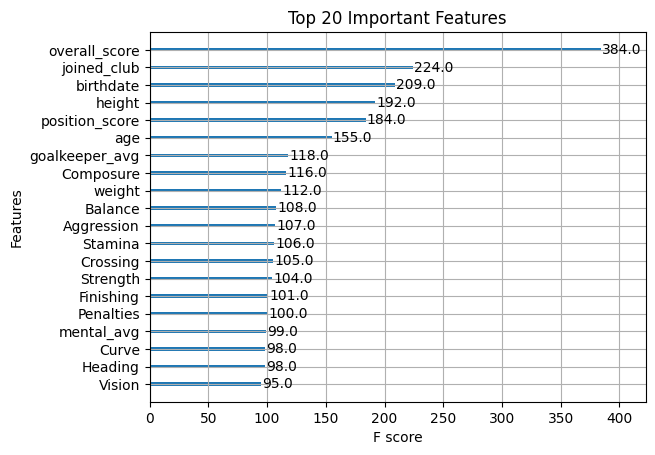

In [ ]:
# Visualize feature importance
plt.figure(figsize=(10, 8))
plot_importance(model, max_num_features=20)
plt.title("Top 20 Important Features")
plt.show()

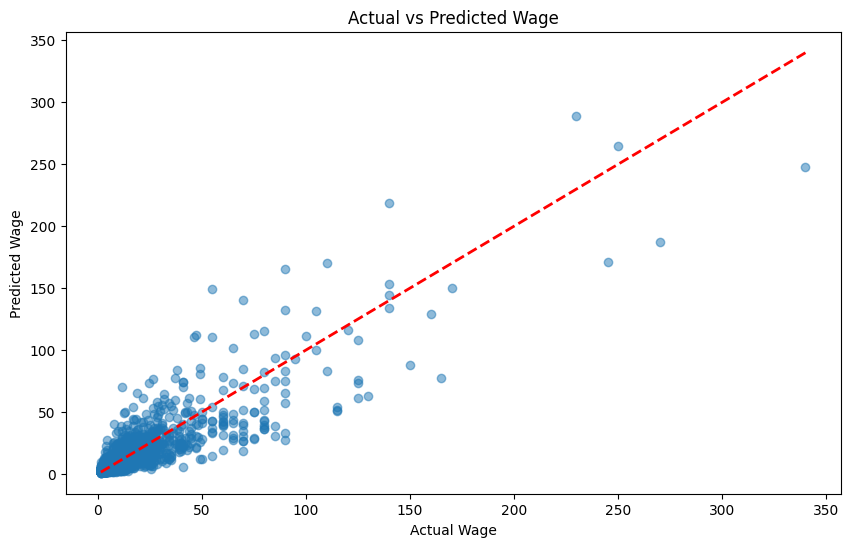

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Wage")
plt.ylabel("Predicted Wage")
plt.title("Actual vs Predicted Wage")
plt.show()

In [ ]:
# Train MLP model
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = y_tf.inverse_transform(y_pred.reshape(-1, 1))

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 221.98276816986458
R2 Score: 0.33576189891186936


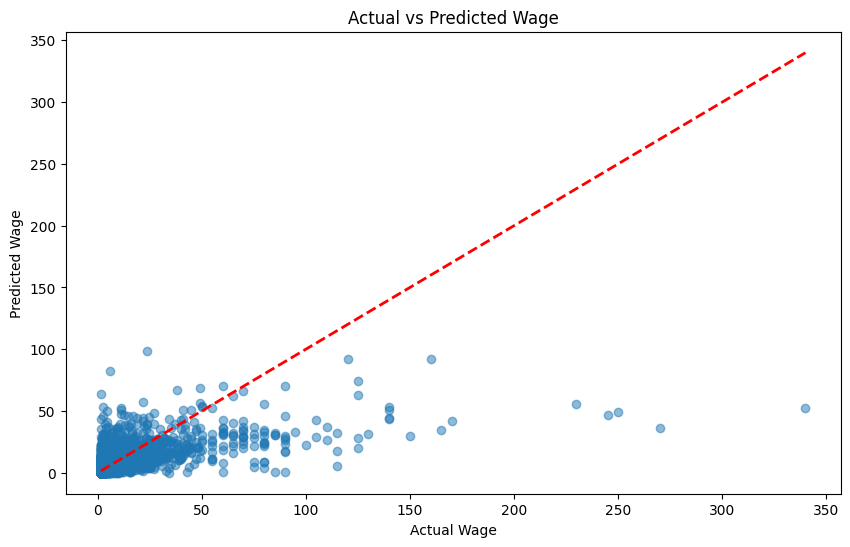

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Wage")
plt.ylabel("Predicted Wage")
plt.title("Actual vs Predicted Wage")
plt.show()